In [1]:
!pip install matplotlib seaborn networkx pandas

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd

In [6]:
# Load the Titanic dataset
path_var = '/Users/mahak/Downloads/Titanic'
titanic_df = pd.read_csv(f'{path_var}/Titanic_full.csv')
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Text(0.5, 1.0, 'Correlation plots between the dataset features')

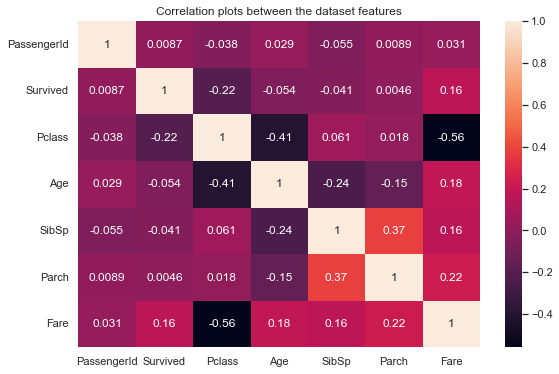

In [17]:
# Plotting the titanic dataset correlation plot 
sns.set_theme()
plt.subplots(figsize=(9, 6))
c=titanic_df.corr()
sns.heatmap(c, annot=True)
plt.title("Correlation plots between the dataset features")

<b>Confounding:</b>
Confounding occurs when an external factor (the confounder) affects both the independent variable (cause) and the dependent variable (effect), leading to a spurious association between them.

Example from Titanic Dataset:

Let's visualize the relationship between Pclass and Survived, and then introduce Age as a potential confounder.

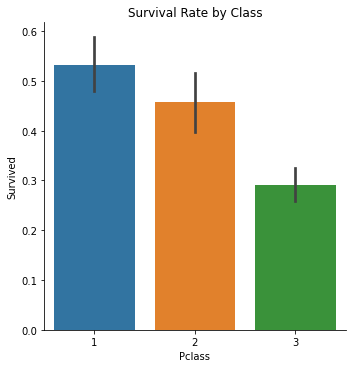

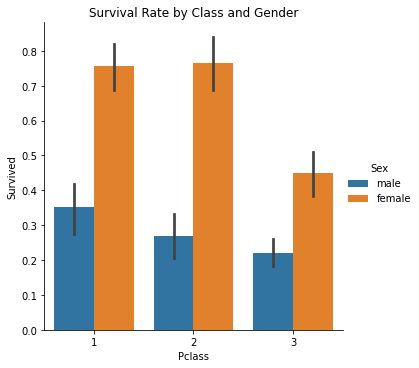

In [8]:
# Plot survival rate by class
sns.catplot(data=titanic_df, x='Pclass', y='Survived', kind='bar')
plt.title('Survival Rate by Class')
plt.show()

# Plot survival rate by class and age
sns.catplot(data=titanic_df, x='Pclass', y='Survived', hue='Sex', kind='bar')
plt.title('Survival Rate by Class and Gender')
plt.show()

From the plots, we can see that survival rates differ by class and gender.

<b>Causal Graphs:</b>
    
Causal Graphs (or Directed Acyclic Graphs - DAGs) are visual representations of causal relationships between variables.

Example from Titanic Dataset:

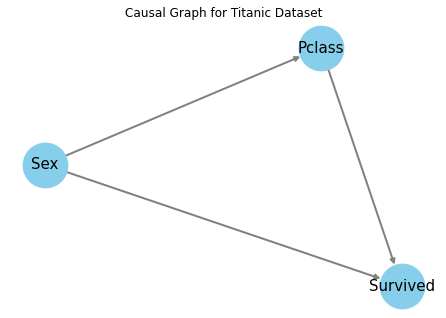

In [9]:
# Create a DAG
G = nx.DiGraph()
G.add_edges_from([('Pclass', 'Survived'), ('Sex', 'Survived'), ('Sex', 'Pclass')])

# Draw the DAG
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=15, width=2, edge_color='gray')
plt.title('Causal Graph for Titanic Dataset')
plt.show()

This DAG suggests potential causal relationships: both Pclass and Sex might influence Survived, and Sex might also influence Pclass

<b>DAGs and Probability Distributions:</b>
DAGs can represent joint probability distributions over the variables they include.

For the Titanic dataset, if we consider only Pclass, Age, and Survived, the joint distribution can be represented as:

P(Pclass,Age,Survived)=P(Survived∣Pclass,Age)∗P(Pclass∣Age)∗P(Age)

To compute these probabilities from the dataset:

In [16]:
# P(Age)
p_age = titanic_df['Age'].value_counts(normalize=True)

# P(Pclass | Age)
p_pclass_given_Age = titanic_df.groupby('Age')['Pclass'].value_counts(normalize=True)

# P(Survived | Pclass, Age)
p_survived_given_pclass_Age = titanic_df.groupby(['Age','Pclass'])['Survived'].mean()

print(p_age, p_pclass_given_Age, p_survived_given_pclass_Age)


24.0    0.044933
22.0    0.041109
21.0    0.039197
30.0    0.038241
18.0    0.037285
          ...   
23.5    0.000956
70.5    0.000956
55.5    0.000956
20.5    0.000956
38.5    0.000956
Name: Age, Length: 98, dtype: float64 Age    Pclass
0.17   3         1.0
0.33   3         1.0
0.42   3         1.0
0.67   2         1.0
0.75   3         1.0
                ... 
70.50  3         1.0
71.00  1         1.0
74.00  3         1.0
76.00  1         1.0
80.00  1         1.0
Name: Pclass, Length: 209, dtype: float64 Age    Pclass
0.17   3         0.000000
0.33   3         0.000000
0.42   3         1.000000
0.67   2         1.000000
0.75   3         0.666667
                   ...   
70.50  3         0.000000
71.00  1         0.000000
74.00  3         0.000000
76.00  1         0.000000
80.00  1         1.000000
Name: Survived, Length: 209, dtype: float64


This representation allows us to factorize the joint distribution in a way that reflects the causal structure we believe to be present in the system

<b>Residual Plot :</b>For the Titanic dataset, let's hypothesize that age has a causal effect on fare.
 We'll fit a linear regression model and then create a residual plot to examine this relationship.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


C:\Users\mahak\AppData\Local\Temp\ipykernel_16572\1055702603.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['predicted_fare'] = model.predict(X)
C:\Users\mahak\AppData\Local\Temp\ipykernel_16572\1055702603.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['residuals'] = titanic['Fare'] - titanic['predicted_fare']


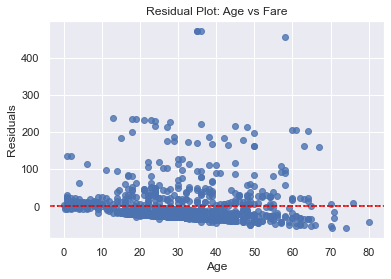

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Checking the information of the Dataframe
titanic_df.info()
# Drop NaN values from age and fare columns
titanic = titanic_df.dropna(subset=['Age', 'Fare'])

# Fit a linear regression model to predict fare based on age
X = titanic[['Age']]
y = titanic['Fare']
model = LinearRegression().fit(X, y)
titanic['predicted_fare'] = model.predict(X)

# Calculate residuals
titanic['residuals'] = titanic['Fare'] - titanic['predicted_fare']

# Create a residual plot
sns.residplot(x=titanic['Age'], y=titanic['residuals'])
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot: Age vs Fare')
plt.ylabel('Residuals')
plt.show()


In the residual plot, if the residuals are randomly scattered around the horizontal line (y=0), it suggests that age explains the variation in fare, consistent with our causal hypothesis. If there's a clear pattern in the residuals, it suggests that other factors, not accounted for in the model, also influence fare.

However, it's crucial to understand that even if the residuals seem random, it doesn't prove causality. There could be confounding variables or other complexities that the simple linear model doesn't capture. The residual plot is just one tool among many in the causal inference toolbox.